In [105]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import copy

In [2]:
img = cv2.imread('set/cards/card226_b_1_f_o.jpg')
wb = cv2.xphoto.createGrayworldWB()
balanced_img = wb.balanceWhite(img)
cv2.imshow('Original Image', img)
cv2.imshow('Balanced Image', balanced_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
def detect_color(src):
    # Extract the channels
    blue_channel = src[:,:,0]
    green_channel = src[:,:,1]
    red_channel = src[:,:,2]

    center_column_index = blue_channel.shape[1] // 2

    blue_column = blue_channel[150:350, center_column_index]
    green_column = green_channel[150:350, center_column_index]
    red_column = red_channel[150:350, center_column_index]

    plt.figure()
    plt.plot(blue_column, "blue")
    plt.plot(green_column, "green")
    plt.plot(red_column, "red")
    
    blue_sum = sum(blue_column)
    green_sum = sum(green_column)
    red_sum = sum(red_column)

    print(f"blue_sum: {blue_sum}")
    print(f"green_sum: {green_sum}")
    print(f"red_sum: {red_sum}")

    if (blue_sum >= green_sum and blue_sum >= red_sum):
        return "b"
    elif (green_sum >= blue_sum and green_sum >= red_sum):
        return "g"
    else:
        return "r"

blue_sum: 15552
green_sum: 10299
red_sum: 11847


'b'

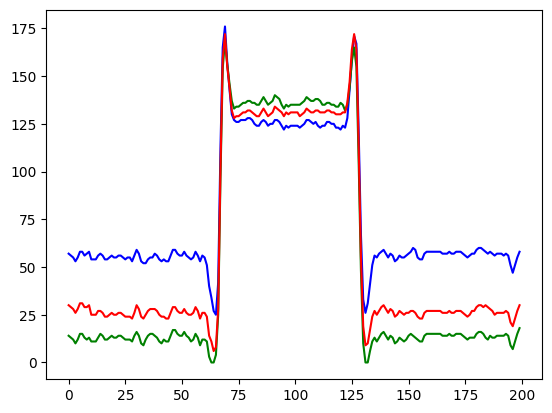

In [4]:
# Read the color image
img = cv2.imread('set/cards/card232_b_2_f_t.jpg')

# apply white balance
wb = cv2.xphoto.createGrayworldWB()
balanced_img = wb.balanceWhite(img)

detect_color(balanced_img)

In [5]:
def detect_amount(gray_image):
    MIN_OBJECT_LENGTH = 50

    blurred_image = cv2.GaussianBlur(gray_image, (25,25), 3)

    # binarize image
    ret, binarized_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # get a vertical array of pixels in the center of the image
    center_column_index = binarized_image.shape[1] // 2
    center_column = binarized_image[:, center_column_index]

    zero_counter = 0
    small_row = 0
    amount = 0
    for i in range(len(center_column)):
        if (center_column[i] == 0): # counting zeros
            zero_counter += 1
        elif (zero_counter > 0): # row of zeros has reached its end
            # checking how long the row of zeros was
            
            # case 1: long row of zeros. before this was not a single small row
            if (zero_counter > MIN_OBJECT_LENGTH and small_row == 0):
                amount += 1
            # case 2: small row of zeros.
            elif (zero_counter < MIN_OBJECT_LENGTH):
                if (small_row == 0):
                    small_row += 1
                elif (small_row == 1):
                    amount += 1
                    small_row = 0
                else: 
                    print("error 8493")
            # case 3: else. Error
            else:
                print("error 9483")
                
            zero_counter = 0

    plt.figure()
    plt.imshow(binarized_image, cmap='gray')
    plt.vlines(center_column_index, 0, len(center_column), "red")

    plt.figure()
    plt.plot(center_column, "red")

    return amount

2

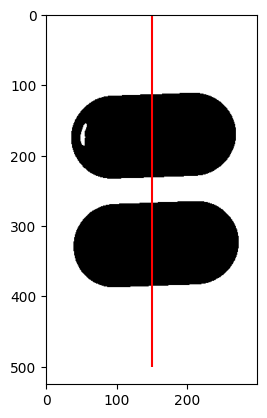

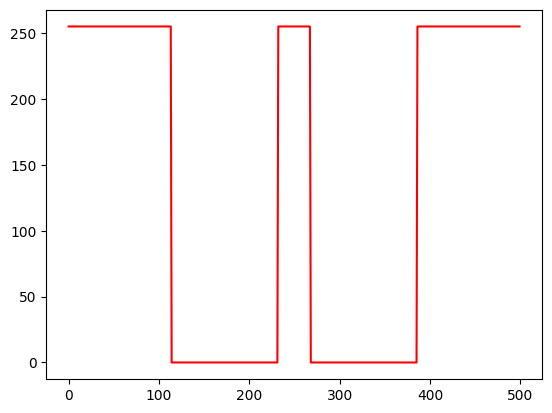

In [6]:
# Read the color image as a grayscale image
gray_image = cv2.imread("set/cards/card92_b_2_s_o.jpg", cv2.IMREAD_GRAYSCALE)

detect_amount(gray_image)

In [7]:
def detect_filling(gray_image):
    blurred_image = cv2.GaussianBlur(gray_image, (25,25), 3)

    # get a vertical array of pixels in the center of the image
    center_column_index = blurred_image.shape[1] // 2
    center_column = blurred_image[:, center_column_index]
        
    plt.figure()
    plt.imshow(blurred_image, cmap='gray')
    plt.vlines(center_column_index, 0, len(center_column), "red")

    plt.figure()
    plt.plot(center_column, "red")

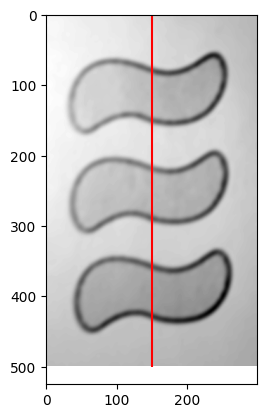

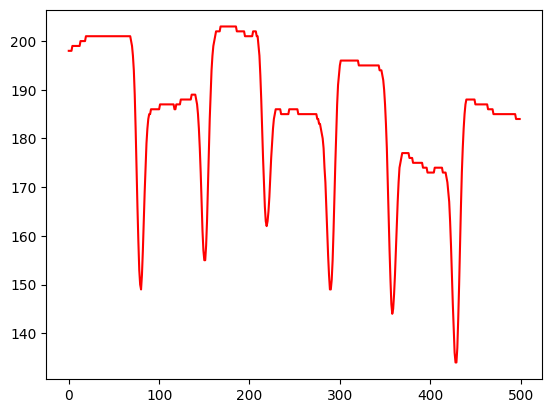

In [8]:
# Read the color image as a grayscale image
gray_image = cv2.imread("set/cards/card79_b_3_s_t.jpg", cv2.IMREAD_GRAYSCALE)

detect_filling(gray_image)

In [119]:
# schlechte Methode
def fill_form(binarized_image):

    BLACK = 0
    WHITE = 255
    MAYBE_BLACK = 200

    # Maße des Bildes bestimmen
    height, width = binarized_image.shape

    # # Extrahieren aller äußeren Konturen als Liste von Pixelketten
    # contours,_ = cv2.findContours(binarized_image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # annotated=binarized_image.copy()

    # contours = contours[1:len(contours)-2]

    # for i in range(len(contours)):
    #     contours[i] = cv2.convexHull(contours[i])

    # for contour in contours: 
    #     cv2.drawContours(annotated, [contour], 0, 100, 2)
        

    # # Create a mask to fill the area within the contours
    # mask = np.zeros(binarized_image.shape, dtype=np.uint8)
    # color = 0  # Color for the filled area
    # cv2.fillPoly(mask, contours, color)

    # # Apply the mask to the original image
    # result = cv2.bitwise_and(binarized_image, mask)


    # plt.imshow(annotated, cmap="gray")

    result = copy.deepcopy(binarized_image)
    black_to_white = False
    print(binarized_image)
    for y in range(height):
        for x in range(1,width):
            if (binarized_image[y][x-1] == BLACK and binarized_image[y][x] == WHITE):
                black_to_white = True
            elif (binarized_image[y][x-1] == WHITE and binarized_image[y][x] == BLACK):
                black_to_white = False
            
            if (black_to_white and (binarized_image[y][x] == WHITE)):
                result[y][x] = MAYBE_BLACK
        black_to_white = False

    black_pixels_right = False
    for y in range(height-1,-1,-1):
        for x in range(width-1,-1,-1):
            if (result[y][x] == BLACK):
                black_pixels_right = True
            if (black_pixels_right and (result[y][x] == MAYBE_BLACK)):
                result[y][x] = BLACK
            elif (not(black_pixels_right) and (result[y][x] == MAYBE_BLACK)):
                result[y][x] = WHITE
            else:
                print("error 0284")
        black_pixels_right = False
    
    plt.imshow(result, cmap="gray")
    print(result)
    return result

In [222]:
def get_match_score(object, sample):
    
    height, width = sample.shape

    match_score = 0
    for x in range(width):
        for y in range(height):
            if (sample[y][x] != object[y][x]):
                match_score += 1
    return match_score

In [223]:
def detect_form(gray_image):
    oval_sample = cv2.imread("sample/oval.jpg", cv2.IMREAD_GRAYSCALE)
    diamond_sample = cv2.imread("sample/diamond.jpg", cv2.IMREAD_GRAYSCALE)
    wave_sample = cv2.imread("sample/bad_wave.jpg", cv2.IMREAD_GRAYSCALE)



    blurred_image = cv2.GaussianBlur(gray_image, (25,25), 3)

    # binarize image
    ret, binarized_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Speichere das veränderte Bild
    plt.figure()
    plt.imshow(blurred_image)

    plt.figure()
    plt.imshow(binarized_image)

    binarized_image = fill_form(binarized_image)

    # Find contours
    contours, _ = cv2.findContours(binarized_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours = contours[1:]

    # Extract and store the objects
    object_arrays = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        object_arrays.append(binarized_image[y:y+h, x:x+w])
        #cv2.drawContours(binarized_image, [contour], 0, 200, 5)


    # process objects
        
    for object in object_arrays:

        destRect = [[0,0],[230,0],[230,115],[0,115]]

        #transformMatrix = cv2.getPerspectiveTransform(object, destRect)

        #cardImage = cv2.warpPerspective(img,transformMatrix,(300,500))

        # resize object so it can be subtracted from the sample images
        resized = cv2.resize(object, (230, 115))

        # PATTERN MATCHING (Subtraction)
        # oval_match =  resized - oval_sample
        # diamond_match =  resized - diamond_sample
        # wave_match = resized - wave_sample

        

        print(f"oval: {get_match_score(resized, oval_sample)}")
        print(f"diamond: {get_match_score(resized, diamond_sample)}")
        print(f"wave: {get_match_score(resized, wave_sample)}")
        print("--------")





        plt.figure()
        plt.imshow(resized, cmap="gray")

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error

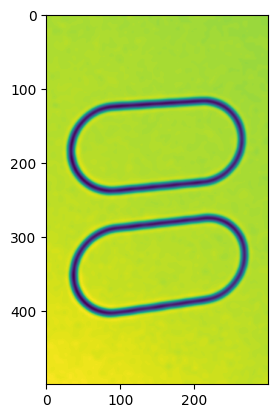

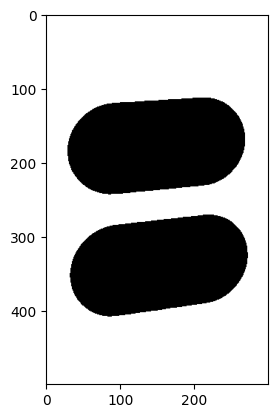

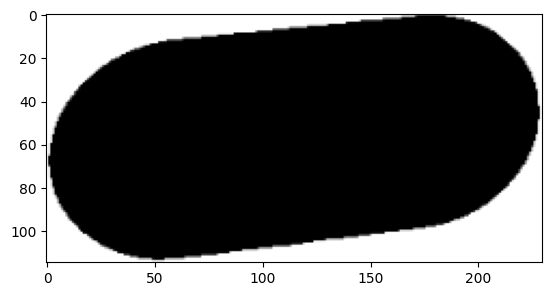

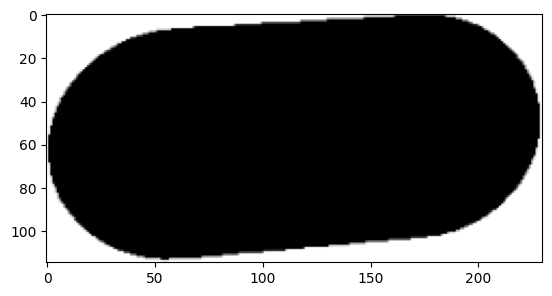

In [226]:
# Read the color image as a grayscale image
gray_image = cv2.imread("set/cards/card225_b_2_l_o.jpg", cv2.IMREAD_GRAYSCALE)
detect_form(gray_image)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284
error 0284


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

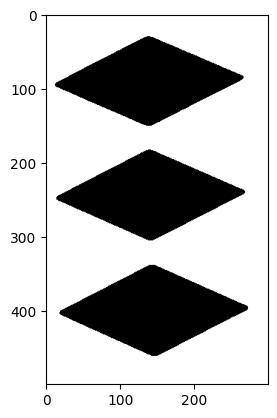

In [116]:

gray_image = cv2.imread("set/cards/card200_g_3_l_v.jpg", cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(gray_image, (25,25), 3)

# binarize image
ret, binarized_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(binarized_image)

fill_form(binarized_image)

In [154]:
np.array([[0,0],[300,0],[300,500],[0,500]])

array([[  0,   0],
       [300,   0],
       [300, 500],
       [  0, 500]])